# 1. Exploración y Preprocesamiento de Datos (EDA)

Se realiza un análisis exploratorio del dataset, identificando problemas de calidad,
outliers y observaciones relevantes. Para su análisis en Power BI.

## 1.1 Importación de librerías

Se utilizan librerías estándar para análisis de datos:
- **pandas**: manejo de dataframes
- **numpy**: operaciones numéricas
- **matplotlib / seaborn**: visualización

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Carga de datos

Se carga el dataset marketing_raw.csv que contiene información de clientes,
sus características demográficas, comportamiento de compra y respuesta a campañas.

In [16]:
df_mark = pd.read_csv(r'C:\Users\jair1\Downloads\Grupo-8\Data\marketing_raw.csv', delimiter=",")

In [17]:
df_mark.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,$58138,0,0,58,$635,$88,$546,$172,$88,$88,...,0,0,0,0,1,0,0,$1529,1441,0
1,$46344,1,1,38,$11,$1,$6,$2,$1,$6,...,0,0,0,0,1,0,0,$21,15,0
2,$71613,0,0,26,$426,$49,$127,$111,$21,$42,...,1,0,0,0,1,0,0,$734,692,0
3,$26646,1,0,26,$11,$4,$20,$10,$3,$5,...,1,0,0,0,1,0,0,$48,43,0
4,$58293,1,0,94,$173,$43,$118,$46,$27,$15,...,0,0,0,0,0,0,1,$407,392,0


## 1.3 Exploración inicial

Se revisa la estructura del dataset:
- Tipos de datos
- Valores nulos
- Estadísticas básicas

In [18]:
df_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Income                2205 non-null   object
 1   Kidhome               2205 non-null   int64 
 2   Teenhome              2205 non-null   int64 
 3   Recency               2205 non-null   int64 
 4   MntWines              2205 non-null   object
 5   MntFruits             2205 non-null   object
 6   MntMeatProducts       2205 non-null   object
 7   MntFishProducts       2205 non-null   object
 8   MntSweetProducts      2205 non-null   object
 9   MntGoldProds          2205 non-null   object
 10  NumDealsPurchases     2205 non-null   int64 
 11  NumWebPurchases       2205 non-null   int64 
 12  NumCatalogPurchases   2205 non-null   int64 
 13  NumStorePurchases     2205 non-null   int64 
 14  NumWebVisitsMonth     2205 non-null   int64 
 15  AcceptedCmp3          2205 non-null   

In [19]:
df_mark.describe(include="all")

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205,2205.000000,2205.000000,2205.000000,2205,2205,2205,2205,2205,2205,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205,2205.000000,2205.00000
unique,1963,NaN,NaN,NaN,775,158,551,182,176,212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,897,NaN,NaN
top,$7500,NaN,NaN,NaN,$2,$0,$7,$0,$0,$3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$39,NaN,NaN
freq,12,NaN,NaN,NaN,41,393,53,379,411,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN
mean,NaN,0.442177,0.506576,49.009070,NaN,NaN,NaN,NaN,NaN,NaN,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,NaN,518.707483,0.29932
std,NaN,0.537132,0.544380,28.932111,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,NaN,553.847248,0.68044
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-283.000000,0.00000
25%,NaN,0.000000,0.000000,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,42.000000,0.00000
50%,NaN,0.000000,0.000000,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,288.000000,0.00000
75%,NaN,1.000000,1.000000,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,884.000000,0.00000


## 1.4 Valores nulos y duplicados

Se identifican columnas con valores faltantes y registros duplicados.

In [20]:
df_mark.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [21]:
df_mark.duplicated().sum()

184

## 1.5 Limpieza de columnas numéricas guardadas como texto

Se eliminan símbolos `$` y se convierten las columnas de ingreso y gasto a formato numérico.

In [22]:
df_mark["Income"] = df_mark["Income"].replace('[\$,]', '', regex=True).astype(float)

In [23]:
df_mark.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,$635,$88,$546,$172,$88,$88,...,0,0,0,0,1,0,0,$1529,1441,0
1,46344.0,1,1,38,$11,$1,$6,$2,$1,$6,...,0,0,0,0,1,0,0,$21,15,0
2,71613.0,0,0,26,$426,$49,$127,$111,$21,$42,...,1,0,0,0,1,0,0,$734,692,0
3,26646.0,1,0,26,$11,$4,$20,$10,$3,$5,...,1,0,0,0,1,0,0,$48,43,0
4,58293.0,1,0,94,$173,$43,$118,$46,$27,$15,...,0,0,0,0,0,0,1,$407,392,0


In [24]:
mnt_gasto = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","MntTotal"]
for col in mnt_gasto:
    df_mark[col] = df_mark[col].replace('[\$,]', '', regex=True).astype(float)
# Hacemos el proceso de quitar el signo a las demás columnas

- Income y montos de gasto guardados como texto con `$`.

In [25]:
df_mark.dtypes
# verificamos el resultado

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                float64
MntFruits               float64
MntMeatProducts         float64
MntFishProducts         float64
MntSweetProducts        float64
MntGoldProds            float64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

# 2. Preprocesamiento de Datos 
- En base a las observaciones anteriores, realice el preprocesamiento de datos para mejorar la calidad del mismo.

## 2.1 Limpieza de duplicados

In [26]:
df_mark.duplicated().sum()

184

- Se eliminan los registros duplicados identificados previamente.
- Se crea df_mark_limpio para almacenar ahí el dataframe sin valores duplicados

In [27]:
df_mark_limpio = df_mark.drop_duplicates()

In [28]:
df_mark_limpio

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,88.0,...,0,0,0,0,1,0,0,1529.0,1441,0
1,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,...,0,0,0,0,1,0,0,21.0,15,0
2,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,...,1,0,0,0,1,0,0,734.0,692,0
3,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,...,1,0,0,0,1,0,0,48.0,43,0
4,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,...,0,0,0,0,0,0,1,407.0,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5.0,1.0,6.0,3.0,4.0,3.0,...,0,0,0,0,1,0,0,19.0,16,0
2200,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,247.0,...,0,0,0,0,1,0,0,1094.0,847,0
2202,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,24.0,...,0,0,0,0,1,0,0,1217.0,1193,1
2203,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,61.0,...,1,0,0,0,0,1,0,782.0,721,0


In [29]:
df_mark_limpio.duplicated().sum()

0

## 2.2 Verificación y limpieza de valores extremos en edades

Ya que no se identificaron valores inválidos extremos (la edad máxima es 80, no 99999 como se mencionó), pero realizamos una verificación adicional:

In [30]:
# Verificar valores atípicos en edades
edad_min, edad_max = df_mark_limpio["Age"].min(), df_mark_limpio["Age"].max()
print(f"Edad mínima: {edad_min}")
print(f"Edad máxima: {edad_max}")

Edad mínima: 24
Edad máxima: 80


In [31]:
# Definir rango razonable para edades (18-100 años)
rango_edad_valido = (18, 100)
edades_fuera_rango = df_mark_limpio[(df_mark_limpio["Age"] < rango_edad_valido[0]) | 
                                   (df_mark_limpio["Age"] > rango_edad_valido[1])]
if len(edades_fuera_rango) > 0:
    edad_mediana = df_mark_limpio["Age"].median()
    print(f"Reemplazando valores fuera de rango con la mediana: {edad_mediana}")
    df_mark_limpio.loc[(df_mark_limpio["Age"] < rango_edad_valido[0]) | 
                      (df_mark_limpio["Age"] > rango_edad_valido[1]), "Age"] = edad_mediana
else:
    print("Todas las edades están dentro del rango razonable.")

Todas las edades están dentro del rango razonable.


## 2.3 Manejo de valores negativos en MntRegularProds

Se identificaron valores negativos en MntRegularProds que no tienen sentido lógico para montos de gasto.

In [32]:
# Verificar valores negativos en MntRegularProds
valores_negativos = df_mark_limpio[df_mark_limpio["MntRegularProds"] < 0]
valores_negativos

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1307,6560.0,0,0,2,67.0,11.0,26.0,4.0,3.0,262.0,...,0,0,0,0,0,1,0,111.0,-151,0
1780,7144.0,0,2,92,81.0,4.0,33.0,5.0,2.0,291.0,...,0,0,0,0,0,0,1,125.0,-166,0
1949,4428.0,0,1,0,16.0,4.0,12.0,2.0,4.0,321.0,...,0,0,0,0,1,0,0,38.0,-283,0


In [33]:
# Reemplazar valores negativos con 0 (asumiendo que son errores de registro)
if len(valores_negativos) > 0:
    df_mark_limpio.loc[df_mark_limpio["MntRegularProds"] < 0, "MntRegularProds"] = 0
valores_negativos_despues = df_mark_limpio[df_mark_limpio["MntRegularProds"] < 0]

In [34]:
valores_negativos_despues

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall


## 2.4 Verificación de consistencia entre MntTotal y los gastos individuales

In [35]:
gastos_individuales = ["MntWines", "MntFruits", "MntMeatProducts", 
                       "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

In [36]:
df_mark_limpio["MntCalculado"] = df_mark_limpio[gastos_individuales].sum(axis=1)
df_mark_limpio["Diferencia_Mnt"] = abs(df_mark_limpio["MntTotal"] - df_mark_limpio["MntCalculado"])
inconsistencias = df_mark_limpio[df_mark_limpio["Diferencia_Mnt"] > 1]

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\2283539694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["MntCalculado"] = df_mark_limpio[gastos_individuales].sum(axis=1)
C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\2283539694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["Diferencia_Mnt"] = abs(df_mark_limpio["MntTotal"] - df_mark_limpio["MntCalculado"])


In [37]:
df_mark_limpio.max()

Income                  113734.0
Kidhome                      2.0
Teenhome                     2.0
Recency                     99.0
MntWines                  1493.0
MntFruits                  199.0
MntMeatProducts           1725.0
MntFishProducts            259.0
MntSweetProducts           262.0
MntGoldProds               321.0
NumDealsPurchases           15.0
NumWebPurchases             27.0
NumCatalogPurchases         28.0
NumStorePurchases           13.0
NumWebVisitsMonth           20.0
AcceptedCmp3                 1.0
AcceptedCmp4                 1.0
AcceptedCmp5                 1.0
AcceptedCmp1                 1.0
AcceptedCmp2                 1.0
Complain                     1.0
Z_CostContact                3.0
Z_Revenue                   11.0
Response                     1.0
Age                         80.0
Customer_Days             2858.0
marital_Divorced             1.0
marital_Married              1.0
marital_Single               1.0
marital_Together             1.0
marital_Wi

In [38]:
print(f"Registros con inconsistencia en montos totales: {len(inconsistencias)}")

Registros con inconsistencia en montos totales: 1902


## 2.5 creación de variables derivadas

A continuación se crean variables derivadas útiles que pueden ser utilizadas para los análisis

In [39]:
# Total de hijos en el hogar
df_mark_limpio["Total_Children"] = df_mark_limpio["Kidhome"] + df_mark_limpio["Teenhome"]

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\4032344853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["Total_Children"] = df_mark_limpio["Kidhome"] + df_mark_limpio["Teenhome"]


In [40]:
# Clasificación de clientes por gasto total
df_mark_limpio["Spending_Category"] = pd.qcut(df_mark_limpio["MntTotal"], 
                                             q=3, 
                                             labels=["Low", "Medium", "High"])
print(f"  Creada columna 'Spending_Category' (3 categorías)")

  Creada columna 'Spending_Category' (3 categorías)


C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\3203395369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["Spending_Category"] = pd.qcut(df_mark_limpio["MntTotal"],


In [41]:
# Clasificación por ingresos
df_mark_limpio["Income_Category"] = pd.qcut(df_mark_limpio["Income"], 
                                           q=3, 
                                           labels=["Low", "Medium", "High"])

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\1409172137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["Income_Category"] = pd.qcut(df_mark_limpio["Income"],


In [42]:
# Total de compras en todos los canales
df_mark_limpio["Total_Purchases"] = (df_mark_limpio["NumDealsPurchases"] + 
                                    df_mark_limpio["NumWebPurchases"] + 
                                    df_mark_limpio["NumCatalogPurchases"] + 
                                    df_mark_limpio["NumStorePurchases"])

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\2610673680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["Total_Purchases"] = (df_mark_limpio["NumDealsPurchases"] +


In [43]:
# Porcentaje de compras con descuento
df_mark_limpio["Deals_Percentage"] = np.where(
    df_mark_limpio["Total_Purchases"] > 0,
    df_mark_limpio["NumDealsPurchases"] / df_mark_limpio["Total_Purchases"] * 100, 0
)

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\7673936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["Deals_Percentage"] = np.where(


In [44]:
df_mark_limpio

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,MntTotal,MntRegularProds,AcceptedCmpOverall,MntCalculado,Diferencia_Mnt,Total_Children,Spending_Category,Income_Category,Total_Purchases,Deals_Percentage
0,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,88.0,...,1529.0,1441,0,1617.0,88.0,0,High,Medium,25,12.000000
1,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,...,21.0,15,0,27.0,6.0,2,Low,Medium,6,33.333333
2,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,...,734.0,692,0,776.0,42.0,0,Medium,High,21,4.761905
3,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,...,48.0,43,0,53.0,5.0,1,Low,Low,8,25.000000
4,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,...,407.0,392,0,422.0,15.0,1,Medium,Medium,19,26.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5.0,1.0,6.0,3.0,4.0,3.0,...,19.0,16,0,22.0,3.0,0,Low,Low,4,25.000000
2200,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,247.0,...,1094.0,847,0,1341.0,247.0,1,High,Medium,18,11.111111
2202,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,24.0,...,1217.0,1193,1,1241.0,24.0,0,High,Medium,19,5.263158
2203,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,61.0,...,782.0,721,0,843.0,61.0,1,High,High,23,8.695652


# 3. Reconstrucción de variables categóricas

## 3.1 Crear la columna Marital_Status a partir de marital_*.

In [45]:
# Identificar las columnas
marital_cols = [c for c in df_mark_limpio.columns if c.startswith("marital_")]
marital_cols

['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow']

-  Verificar que realmente son binarias

In [46]:
df_mark_limpio[marital_cols].describe()

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,0.105888,0.388422,0.219198,0.251856,0.034636
std,0.307771,0.487512,0.413806,0.434186,0.182902
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


- Verificar coherencia fila a fila

In [47]:
marital_sum = df_mark_limpio[marital_cols].sum(axis=1)

marital_sum.value_counts().head(10)

1    2021
Name: count, dtype: int64

- Crear la columna Marital_Status

In [48]:
df_mark_limpio["Marital_Status"] = (
    df_mark_limpio[marital_cols].idxmax(axis=1).str.replace("marital_", "", regex=False)
)

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\1623086020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["Marital_Status"] = (


- Revisar el resultado

In [49]:
df_mark_limpio[marital_cols + ["Marital_Status"]].head(10)

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,Marital_Status
0,0,0,1,0,0,Single
1,0,0,1,0,0,Single
2,0,0,0,1,0,Together
3,0,0,0,1,0,Together
4,0,1,0,0,0,Married
5,0,0,0,1,0,Together
6,1,0,0,0,0,Divorced
7,0,1,0,0,0,Married
8,0,0,0,1,0,Together
9,0,0,0,1,0,Together


In [50]:
df_mark_limpio["Marital_Status"].value_counts()

Marital_Status
Married     785
Together    509
Single      443
Divorced    214
Widow        70
Name: count, dtype: int64

## 3.2 Eliminar columnas originales marital_*

In [51]:
# Eliminar columnas originales marital_*
df_mark_limpio.drop(columns=marital_cols, inplace=True)

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\2562774232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio.drop(columns=marital_cols, inplace=True)


- Validación final

In [52]:
("Marital_Status" in df_mark_limpio.columns, any(c.startswith("marital_") for c in df_mark_limpio.columns))

(True, False)

## 3.3 Crear la columna Education a partir de education

In [53]:
# Identificar las columnas education
education_cols = [c for c in df_mark_limpio.columns if c.startswith("education_")]
education_cols

['education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']

- Verificar que sean columnas binarias

In [54]:
df_mark_limpio[education_cols].describe()

,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,0.090549,0.024245,0.502227,0.165760,0.217219
std,0.287038,0.153848,0.500119,0.371957,0.412455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


- Verificar coherencia por fila

In [55]:
education_sum = df_mark_limpio[education_cols].sum(axis=1)
education_sum.value_counts()

1    2021
Name: count, dtype: int64

- Crear la columna Education

In [56]:
df_mark_limpio["Education"] = (
    df_mark_limpio[education_cols]
    .idxmax(axis=1)
    .str.replace("education_", "", regex=False)
)

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\237856543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio["Education"] = (


- Verificar resultado

In [57]:
df_mark_limpio[education_cols + ["Education"]].head(10)

,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Education
0,0,0,1,0,0,Graduation
1,0,0,1,0,0,Graduation
2,0,0,1,0,0,Graduation
3,0,0,1,0,0,Graduation
4,0,0,0,0,1,PhD
5,0,0,0,1,0,Master
6,0,0,1,0,0,Graduation
7,0,0,0,0,1,PhD
8,0,0,0,0,1,PhD
9,0,0,0,0,1,PhD


In [58]:
df_mark_limpio["Education"].value_counts()

Education
Graduation    1015
PhD            439
Master         335
2n Cycle       183
Basic           49
Name: count, dtype: int64

## 3.4 Eliminar columnas originales education

In [59]:
df_mark_limpio.drop(columns=education_cols, inplace=True)

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\3451805119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio.drop(columns=education_cols, inplace=True)


- Validación final

In [60]:
("Education" in df_mark_limpio.columns,
 any(c.startswith("education_") for c in df_mark_limpio.columns))

(True, False)

In [61]:
df_mark_limpio.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmpOverall,MntCalculado,Diferencia_Mnt,Total_Children,Spending_Category,Income_Category,Total_Purchases,Deals_Percentage,Marital_Status,Education
0,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,88.0,...,0,1617.0,88.0,0,High,Medium,25,12.000000,Single,Graduation
1,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,...,0,27.0,6.0,2,Low,Medium,6,33.333333,Single,Graduation
2,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,...,0,776.0,42.0,0,Medium,High,21,4.761905,Together,Graduation
3,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,...,0,53.0,5.0,1,Low,Low,8,25.000000,Together,Graduation
4,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,...,0,422.0,15.0,1,Medium,Medium,19,26.315789,Married,PhD
5,62513.0,0,1,16,520.0,42.0,98.0,0.0,42.0,14.0,...,0,716.0,14.0,1,Medium,Medium,22,9.090909,Together,Master
6,55635.0,0,1,34,235.0,65.0,164.0,50.0,49.0,27.0,...,0,590.0,27.0,1,Medium,Medium,21,19.047619,Divorced,Graduation
7,33454.0,1,0,32,76.0,10.0,56.0,3.0,1.0,23.0,...,0,169.0,23.0,1,Medium,Low,10,20.000000,Married,PhD
8,30351.0,1,0,19,14.0,0.0,24.0,3.0,3.0,2.0,...,0,46.0,2.0,1,Low,Low,6,16.666667,Together,PhD
9,5648.0,1,1,68,28.0,0.0,6.0,1.0,1.0,13.0,...,1,49.0,13.0,2,Low,Low,2,50.000000,Together,PhD


# 4. Tratamiento de valores inválidos

 ## 4.1 Identificar edades con valor 99999.

In [62]:
df_mark_limpio[df_mark_limpio['Age'] >= 99999].shape[0]

0

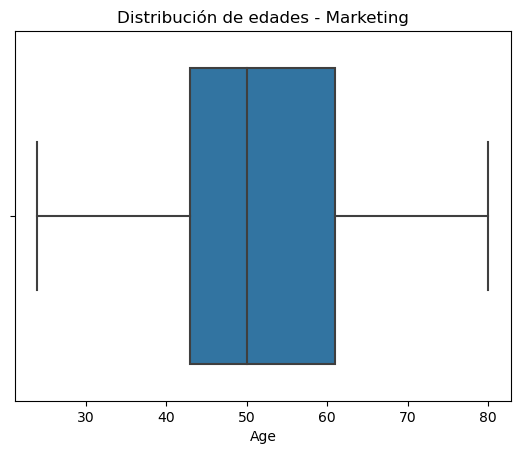

count    2021.000000
mean       51.117269
std        11.667616
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

In [63]:
sns.boxplot(x=df_mark_limpio["Age"])
plt.title("Distribución de edades - Marketing")
plt.show()

df_mark_limpio["Age"].describe()

- Edad con valores inválidos (`99999`).
    - Aunque esto no lo visualice y se puede ver con anterioridad que la edad maxima es 80

## 4.2  Proponer y justificar una estrategia de tratamiento.

Durante la revisión de la variable Age, no se encontraron registros con el valor 99999 en el conjunto de datos analizado.
No obstante, dicho valor sería considerado incorrecto, ya que no corresponde a una edad válida.
En caso de que este tipo de registros estuviera presente, se recomienda tratarlos sustituyéndolos por la mediana de las edades válidas, dado que esta medida reduce el impacto de valores extremos y permite conservar la integridad del dataset.

In [64]:
median_age = df_mark_limpio.loc[df_mark_limpio['Age'] != 99999, 'Age'].median()
df_mark_limpio.loc[df_mark_limpio['Age'] == 99999, 'Age'] = median_age

# 5. Validaciones finales:

## 5.1 Confirmar los tipos de datos correctos

In [65]:
df_mark_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Income               2021 non-null   float64 
 1   Kidhome              2021 non-null   int64   
 2   Teenhome             2021 non-null   int64   
 3   Recency              2021 non-null   int64   
 4   MntWines             2021 non-null   float64 
 5   MntFruits            2021 non-null   float64 
 6   MntMeatProducts      2021 non-null   float64 
 7   MntFishProducts      2021 non-null   float64 
 8   MntSweetProducts     2021 non-null   float64 
 9   MntGoldProds         2021 non-null   float64 
 10  NumDealsPurchases    2021 non-null   int64   
 11  NumWebPurchases      2021 non-null   int64   
 12  NumCatalogPurchases  2021 non-null   int64   
 13  NumStorePurchases    2021 non-null   int64   
 14  NumWebVisitsMonth    2021 non-null   int64   
 15  AcceptedCmp3         2021 

## 5.2 Verificar coherencia general del dataset.

In [66]:
# Edades negativas
(df_mark_limpio['Age'] < 0).sum()

# Ingresos negativos
(df_mark_limpio['Income'] < 0).sum()

# Montos de compra negativos
(df_mark_limpio[['MntWines','MntFruits','MntMeatProducts']].lt(0)).sum()

MntWines           0
MntFruits          0
MntMeatProducts    0
dtype: int64

Tras aplicar los procesos de limpieza, validación y reconstrucción de variables, el dataset presenta consistencia en sus tipos de datos, ausencia de valores inválidos y coherencia general.
El conjunto de datos se encuentra preparado para su análisis y visualización en Power BI.

In [67]:
df_mark_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Income               2021 non-null   float64 
 1   Kidhome              2021 non-null   int64   
 2   Teenhome             2021 non-null   int64   
 3   Recency              2021 non-null   int64   
 4   MntWines             2021 non-null   float64 
 5   MntFruits            2021 non-null   float64 
 6   MntMeatProducts      2021 non-null   float64 
 7   MntFishProducts      2021 non-null   float64 
 8   MntSweetProducts     2021 non-null   float64 
 9   MntGoldProds         2021 non-null   float64 
 10  NumDealsPurchases    2021 non-null   int64   
 11  NumWebPurchases      2021 non-null   int64   
 12  NumCatalogPurchases  2021 non-null   int64   
 13  NumStorePurchases    2021 non-null   int64   
 14  NumWebVisitsMonth    2021 non-null   int64   
 15  AcceptedCmp3         2021 

In [68]:
df_mark_limpio

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmpOverall,MntCalculado,Diferencia_Mnt,Total_Children,Spending_Category,Income_Category,Total_Purchases,Deals_Percentage,Marital_Status,Education
0,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,88.0,...,0,1617.0,88.0,0,High,Medium,25,12.000000,Single,Graduation
1,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,...,0,27.0,6.0,2,Low,Medium,6,33.333333,Single,Graduation
2,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,...,0,776.0,42.0,0,Medium,High,21,4.761905,Together,Graduation
3,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,...,0,53.0,5.0,1,Low,Low,8,25.000000,Together,Graduation
4,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,...,0,422.0,15.0,1,Medium,Medium,19,26.315789,Married,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5.0,1.0,6.0,3.0,4.0,3.0,...,0,22.0,3.0,0,Low,Low,4,25.000000,Single,Graduation
2200,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,247.0,...,0,1341.0,247.0,1,High,Medium,18,11.111111,Married,Graduation
2202,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,24.0,...,1,1241.0,24.0,0,High,Medium,19,5.263158,Divorced,Graduation
2203,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,61.0,...,0,843.0,61.0,1,High,High,23,8.695652,Together,Master


In [69]:
df_mark_limpio.reset_index()

,index,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmpOverall,MntCalculado,Diferencia_Mnt,Total_Children,Spending_Category,Income_Category,Total_Purchases,Deals_Percentage,Marital_Status,Education
0,0,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,...,0,1617.0,88.0,0,High,Medium,25,12.000000,Single,Graduation
1,1,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,...,0,27.0,6.0,2,Low,Medium,6,33.333333,Single,Graduation
2,2,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,...,0,776.0,42.0,0,Medium,High,21,4.761905,Together,Graduation
3,3,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,...,0,53.0,5.0,1,Low,Low,8,25.000000,Together,Graduation
4,4,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,...,0,422.0,15.0,1,Medium,Medium,19,26.315789,Married,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2198,26816.0,0,0,50,5.0,1.0,6.0,3.0,4.0,...,0,22.0,3.0,0,Low,Low,4,25.000000,Single,Graduation
2017,2200,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,...,0,1341.0,247.0,1,High,Medium,18,11.111111,Married,Graduation
2018,2202,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,...,1,1241.0,24.0,0,High,Medium,19,5.263158,Divorced,Graduation
2019,2203,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,...,0,843.0,61.0,1,High,High,23,8.695652,Together,Master


In [70]:
df_mark_limpio

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmpOverall,MntCalculado,Diferencia_Mnt,Total_Children,Spending_Category,Income_Category,Total_Purchases,Deals_Percentage,Marital_Status,Education
0,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,88.0,...,0,1617.0,88.0,0,High,Medium,25,12.000000,Single,Graduation
1,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,...,0,27.0,6.0,2,Low,Medium,6,33.333333,Single,Graduation
2,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,...,0,776.0,42.0,0,Medium,High,21,4.761905,Together,Graduation
3,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,...,0,53.0,5.0,1,Low,Low,8,25.000000,Together,Graduation
4,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,...,0,422.0,15.0,1,Medium,Medium,19,26.315789,Married,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5.0,1.0,6.0,3.0,4.0,3.0,...,0,22.0,3.0,0,Low,Low,4,25.000000,Single,Graduation
2200,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,247.0,...,0,1341.0,247.0,1,High,Medium,18,11.111111,Married,Graduation
2202,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,24.0,...,1,1241.0,24.0,0,High,Medium,19,5.263158,Divorced,Graduation
2203,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,61.0,...,0,843.0,61.0,1,High,High,23,8.695652,Together,Master


Reseteamos los indices para que queden ordenados con respecto a los cambios hechos

In [71]:
df_mark_limpio.reset_index(inplace=True)

In [72]:
df_mark_limpio

,index,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmpOverall,MntCalculado,Diferencia_Mnt,Total_Children,Spending_Category,Income_Category,Total_Purchases,Deals_Percentage,Marital_Status,Education
0,0,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,...,0,1617.0,88.0,0,High,Medium,25,12.000000,Single,Graduation
1,1,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,...,0,27.0,6.0,2,Low,Medium,6,33.333333,Single,Graduation
2,2,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,...,0,776.0,42.0,0,Medium,High,21,4.761905,Together,Graduation
3,3,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,...,0,53.0,5.0,1,Low,Low,8,25.000000,Together,Graduation
4,4,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,...,0,422.0,15.0,1,Medium,Medium,19,26.315789,Married,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2198,26816.0,0,0,50,5.0,1.0,6.0,3.0,4.0,...,0,22.0,3.0,0,Low,Low,4,25.000000,Single,Graduation
2017,2200,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,...,0,1341.0,247.0,1,High,Medium,18,11.111111,Married,Graduation
2018,2202,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,...,1,1241.0,24.0,0,High,Medium,19,5.263158,Divorced,Graduation
2019,2203,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,...,0,843.0,61.0,1,High,High,23,8.695652,Together,Master


Eliminamos la antigua columna de indices

In [73]:
df_mark_limpio.drop(columns="index", inplace=True)

C:\Users\jair1\AppData\Local\Temp\ipykernel_23304\2721922054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark_limpio.drop(columns="index", inplace=True)


In [74]:
df_mark_limpio

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmpOverall,MntCalculado,Diferencia_Mnt,Total_Children,Spending_Category,Income_Category,Total_Purchases,Deals_Percentage,Marital_Status,Education
0,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,88.0,...,0,1617.0,88.0,0,High,Medium,25,12.000000,Single,Graduation
1,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.0,...,0,27.0,6.0,2,Low,Medium,6,33.333333,Single,Graduation
2,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.0,...,0,776.0,42.0,0,Medium,High,21,4.761905,Together,Graduation
3,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.0,...,0,53.0,5.0,1,Low,Low,8,25.000000,Together,Graduation
4,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.0,...,0,422.0,15.0,1,Medium,Medium,19,26.315789,Married,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,26816.0,0,0,50,5.0,1.0,6.0,3.0,4.0,3.0,...,0,22.0,3.0,0,Low,Low,4,25.000000,Single,Graduation
2017,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,247.0,...,0,1341.0,247.0,1,High,Medium,18,11.111111,Married,Graduation
2018,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,24.0,...,1,1241.0,24.0,0,High,Medium,19,5.263158,Divorced,Graduation
2019,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,61.0,...,0,843.0,61.0,1,High,High,23,8.695652,Together,Master


In [75]:
df_mark_limpio.to_csv("marketing_limpio.csv", sep=";", index=False)